In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_context("talk")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/cluster/project/beltrao/gankin/software/miniconda3/envs/mamba_env/envs/vnn/lib/python3.11/runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/cluster/project/beltrao/gankin/software/miniconda3/envs/mamba_env/envs/vnn/lib/python3.11/runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "/cluster/project/beltrao/gankin/software/miniconda3/envs/mamba_env/envs/vnn/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_i

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/cluster/project/beltrao/gankin/software/miniconda3/envs/mamba_env/envs/vnn/lib/python3.11/runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/cluster/project/beltrao/gankin/software/miniconda3/envs/mamba_env/envs/vnn/lib/python3.11/runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "/cluster/project/beltrao/gankin/software/miniconda3/envs/mamba_env/envs/vnn/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_i

AttributeError: _ARRAY_API not found

In [2]:
data_dir = "data/ukb_plink/gcta"
result_dir = "data/results/gwas_results"

In [3]:
# parameters
cohort_size = 5000
n_causal_snps = 80
prevalence = 0.1
heritability = 0.5

# load gwas result, smth like gwas_n5000_prev0.10_h20.1_causal80.assoc
gwas_path = "{}/gwas_n{}_prev{:.2f}_h2{}_causal{}.assoc".format(
    result_dir, cohort_size, prevalence, heritability, n_causal_snps
)
gwas_df = pd.read_csv(gwas_path, sep='\s+')

# display
display(gwas_df.head())

# get gcta snp importances
parameter_path = "{}/gcta_n{}_prev{:.2f}_h2{}_causal{}.par".format(
    data_dir, cohort_size, prevalence, heritability, n_causal_snps
)
causal_snp_df = pd.read_csv(parameter_path, sep='\s+')
# display
display(causal_snp_df.head())

# merge with gwas_df on QTL and SNP 
gwas_df = gwas_df.merge(causal_snp_df, left_on='SNP', right_on='QTL', how='left', suffixes=('', '_causal'))
gwas_df["causal"] = gwas_df["QTL"].notnull()

# get gcta snp importances
pheno_path = "{}/gcta_n{}_prev{:.2f}_h2{}_causal{}.phen".format(
    data_dir, cohort_size, prevalence, heritability, n_causal_snps
)
pheno_df = pd.read_csv(pheno_path, sep='\s+', header=None)
pheno_df.columns = ['FID', 'IID', 'PHENO']
# display
display(pheno_df.head())

assert (pheno_df["PHENO"]==2).sum() == prevalence * cohort_size, "Prevalence does not match the expected value."
assert len(causal_snp_df) == n_causal_snps, "Number of causal SNPs does not match the expected count."
assert gwas_df.causal.sum() == n_causal_snps, "Number of causal SNPs in GWAS results does not match the expected count."

,CHR,SNP,BP,A1,F_A,F_U,A2,CHISQ,P,OR
0,1,common_null_0,1,D,0.328,0.31980,d,0.27930,0.5971,1.0380
1,1,common_null_1,2,D,0.215,0.22020,d,0.14320,0.7051,0.9698
2,1,common_null_2,3,D,0.323,0.33810,d,0.92030,0.3374,0.9340
3,1,common_null_3,4,D,0.071,0.06878,d,0.06919,0.7925,1.0350
4,1,common_null_4,5,D,0.143,0.14880,d,0.23800,0.6257,0.9547


,QTL,RefAllele,Frequency,Effect
0,common_causal_9,D,0.7189,0.757257
1,common_causal_30,D,0.6017,-0.933975
2,common_causal_31,D,0.9400,-0.001041
3,common_causal_47,D,0.5897,1.203040
4,common_causal_75,D,0.7604,0.002504


,FID,IID,PHENO
0,per0,per0,2
1,per1,per1,2
2,per2,per2,1
3,per3,per3,1
4,per4,per4,2


/cluster/project/beltrao/gankin/software/miniconda3/envs/mamba_env/envs/vnn/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/cluster/project/beltrao/gankin/software/miniconda3/envs/mamba_env/envs/vnn/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


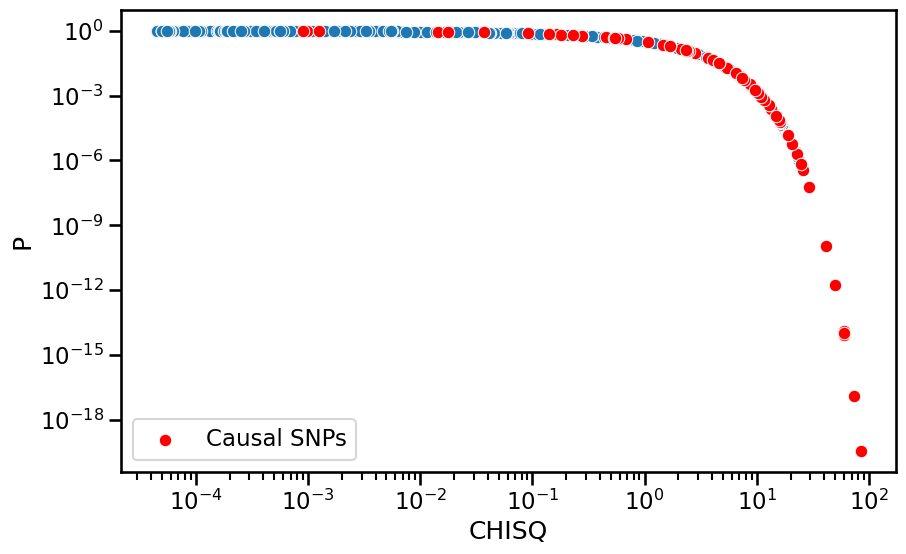

In [4]:
# plot gwas resul≤ts
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gwas_df, x='CHISQ', y='P')#, hue='causal')
sns.scatterplot(data=gwas_df[gwas_df['causal']], x='CHISQ', y='P', color='red', label='Causal SNPs')
plt.xscale('log')
plt.yscale('log')


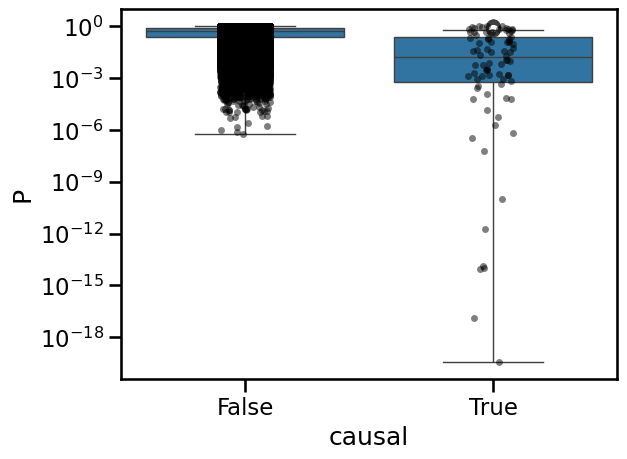

In [5]:
sns.boxplot(data=gwas_df, x='causal', y='P')
# add points
sns.stripplot(data=gwas_df, x='causal', y='P', color='black', alpha=0.5, jitter=True)
plt.yscale('log')

In [6]:
# compute auc of detecting causal genes with p value
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(gwas_df['causal'],-np.log(gwas_df['P']))
print(f"AUC of detecting causal SNPs with p-value: {auc:.4f}")


AUC of detecting causal SNPs with p-value: 0.8057


In [11]:
from sklearn.metrics import roc_auc_score

def load_gwas_result(cohort_size, prevalence, heritability, n_causal_snps):
    # get gwas df and causal snps and merge them

    gwas_path = "{}/gwas_n{}_prev{:.2f}_h2{}_causal{}.assoc".format(
        result_dir, cohort_size, prevalence, heritability, n_causal_snps
    )
    gwas_df = pd.read_csv(gwas_path, sep='\s+')
    # get gcta snp importances
    parameter_path = "{}/gcta_n{}_prev{:.2f}_h2{}_causal{}.par".format(
        data_dir, cohort_size, prevalence, heritability, n_causal_snps
    )
    causal_snp_df = pd.read_csv(parameter_path, sep='\s+')
    # merge with gwas_df on QTL and SNP
    gwas_df = gwas_df.merge(causal_snp_df, left_on='SNP', right_on='QTL', how='left', suffixes=('', '_causal'))
    gwas_df["causal"] = gwas_df["QTL"].notnull()
    # assert that the number of causal SNPs is correct
    assert gwas_df.causal.sum() == n_causal_snps, "Number of causal SNPs in GWAS results does not match the expected count."
    return gwas_df

def compute_auc(gwas_df):
    # compute auc of detecting causal genes with p value
    # make sure P vaulue is not zero, report if zero, and not Nan
    if (gwas_df['P'] == 0).any():
        print("Warning: Some P values are zero, which may affect AUC calculation.")
    if gwas_df['P'].isnull().any():
        print("Warning: Some P values are NaN, which may affect AUC calculation.")
        # check how many are nan then drop na
        n_nan = gwas_df['P'].isnull().sum()
        gwas_df = gwas_df.dropna(subset=['P'])
        print(f"Dropped {n_nan} rows with NaN P values.")
    auc = roc_auc_score(gwas_df['causal'],-np.log(gwas_df['P']+1e-10))  # Adding a small constant to avoid log(0)
    print(f"AUC of detecting causal SNPs with p-value: {auc:.4f}")
    return auc



In [12]:
cohort_sizes = [5000, 50000, 500000]
prevalences = [0.01, 0.05, 0.1, 0.2, 0.5]
heritabilities = [0.1, 0.3, 0.5, 0.7]
causal_snps = [80, 320, 1280, 5120]

# extract aucs for all parameter combinations and save to a dataframe
auc_results = []
for cohort_size in cohort_sizes:
    for prevalence in prevalences:
        for heritability in heritabilities:
            for n_causal_snps in causal_snps:
                gwas_df = load_gwas_result(cohort_size, prevalence, heritability, n_causal_snps)
                auc = compute_auc(gwas_df)
                auc_results.append({
                    'cohort_size': cohort_size,
                    'prevalence': prevalence,
                    'heritability': heritability,
                    'n_causal_snps': n_causal_snps,
                    'auc': auc
                })
auc_df = pd.DataFrame(auc_results)

AUC of detecting causal SNPs with p-value: 0.6131
AUC of detecting causal SNPs with p-value: 0.5620
AUC of detecting causal SNPs with p-value: 0.5535
AUC of detecting causal SNPs with p-value: 0.5092
AUC of detecting causal SNPs with p-value: 0.6588
AUC of detecting causal SNPs with p-value: 0.5736
AUC of detecting causal SNPs with p-value: 0.5435
AUC of detecting causal SNPs with p-value: 0.5132
AUC of detecting causal SNPs with p-value: 0.6455
AUC of detecting causal SNPs with p-value: 0.6134
AUC of detecting causal SNPs with p-value: 0.5501
AUC of detecting causal SNPs with p-value: 0.5144
AUC of detecting causal SNPs with p-value: 0.6797
AUC of detecting causal SNPs with p-value: 0.5866
AUC of detecting causal SNPs with p-value: 0.5527
Dropped 1 rows with NaN P values.
AUC of detecting causal SNPs with p-value: 0.5123
AUC of detecting causal SNPs with p-value: 0.7304
AUC of detecting causal SNPs with p-value: 0.7056
AUC of detecting causal SNPs with p-value: 0.5933
AUC of detecting

<Axes: xlabel='n_causal_snps', ylabel='auc'>

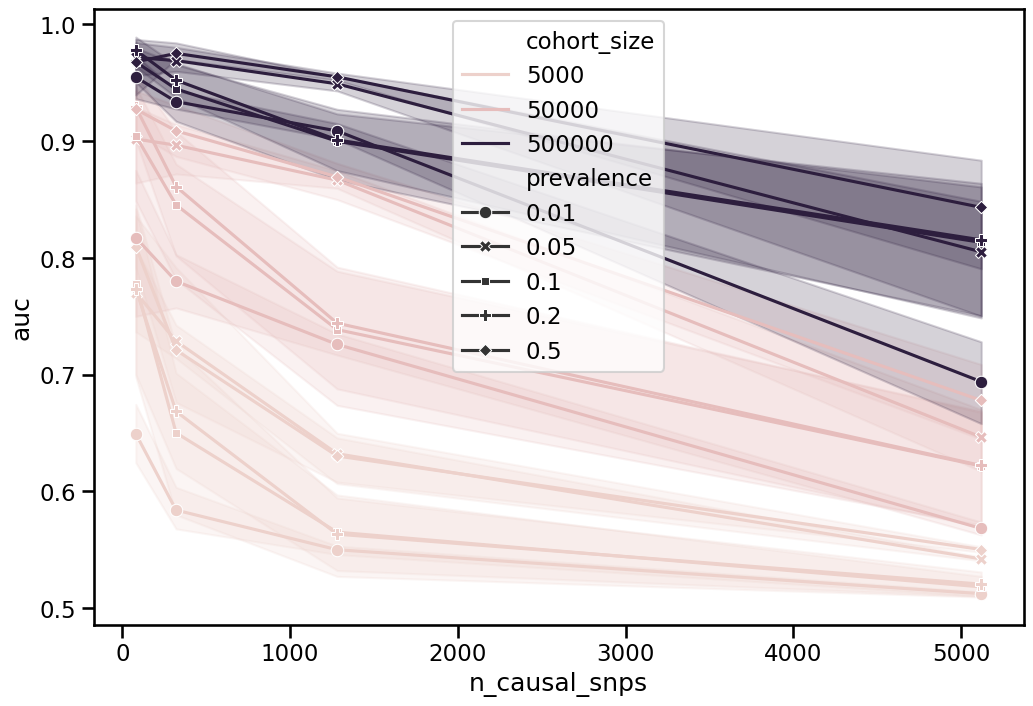

In [13]:
# plot auc results
plt.figure(figsize=(12, 8))
sns.lineplot(data=auc_df, x='n_causal_snps', y='auc', hue='cohort_size', style='prevalence', markers=True, dashes=False)

<Axes: xlabel='n_causal_snps', ylabel='auc'>

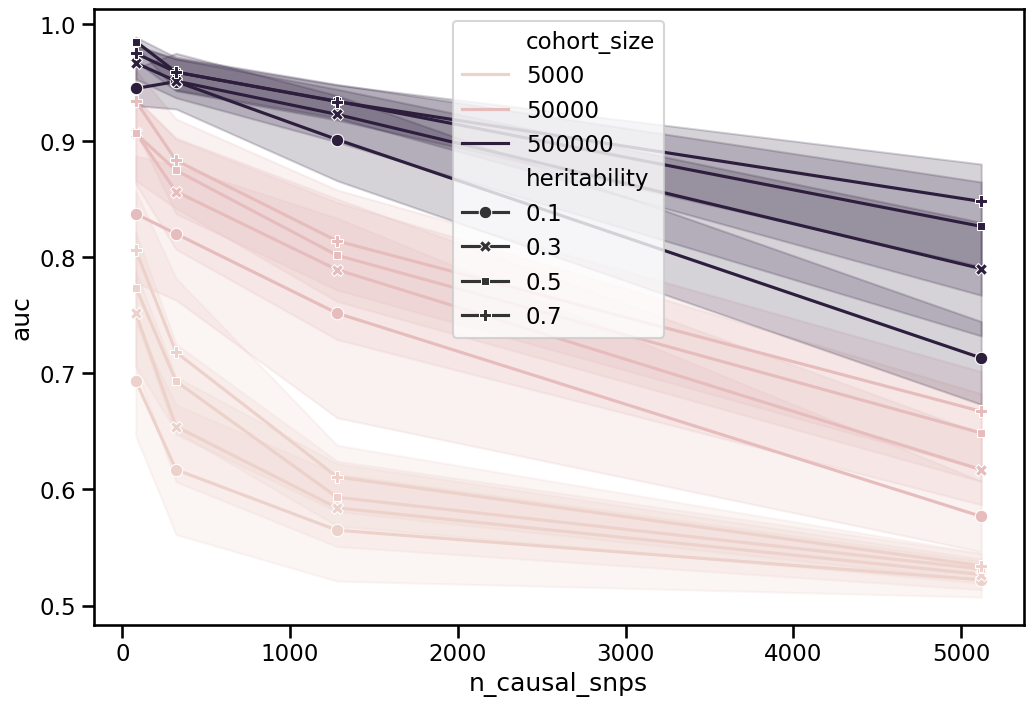

In [14]:
# plot auc results
plt.figure(figsize=(12, 8))
sns.lineplot(data=auc_df, x='n_causal_snps', y='auc', hue='cohort_size', style='heritability', markers=True, dashes=False)